In [7]:
# From Introduction to Deep Learning using Keras by Alex Aklson
# import required modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import load_model

In [8]:
# download the data and divide into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten images
X_train = x_train.reshape(x_train.shape[0], -1) / 255.      # reshape training images to (60000, 28*28)
X_test = x_test.reshape(x_test.shape[0], -1) / 255.         # reshape test images to (60000, 28*28)    

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# convert y_train and y_test using to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# number of classes
num_classes = Y_test.shape[1]
print(num_classes)

10


In [10]:
# define classification model
def classification_model():
    # create model
    input_features = X_train.shape[1]
    model = Sequential()
    model.add(Dense(input_features, activation='relu', input_shape=(input_features,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

# evaluate the model
scores = model.evaluate(X_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.1822 - accuracy: 0.9431 - val_loss: 0.0954 - val_accuracy: 0.9695
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0799 - accuracy: 0.9754 - val_loss: 0.0840 - val_accuracy: 0.9730
Epoch 3/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0734 - val_accuracy: 0.9764
Epoch 4/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0687 - val_accuracy: 0.9797
Epoch 5/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0686 - val_accuracy: 0.9819
Epoch 6/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0812 - val_accuracy: 0.9781
Epoch 7/10
60000/60000 [==============================] 

In [12]:
# save model
model.save('classification_model.h5')

# load model for reusing
pretrained_model = load_model('classification_model.h5')

TypeError: Invalid shape (10,) for image data

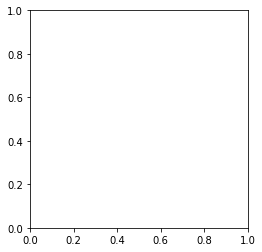

In [14]:
y_pred = model.predict(X_test)
print(plt.imshow(y_pred[0]), plt.imshow(Y_test[0]))